# Test Problems

Plotting scripts that run the *therefore* project code which implements simple corner balance method with numba acceleration!

In [1]:
import therefore
import numpy as np
import matplotlib.pyplot as plt


def flatLinePlot(x, y):
    for i in range(y.size):
        xx = x[i:i+2]
        yy = [y[i], y[i]]
        plt.plot(xx, yy, '-k')

In [2]:
# uniform infinite medium 

data_type = np.float64

L = 1
dx = .01
xsec = 10
ratio = 0
scattering_xsec = xsec*ratio
source = 10
N_mesh = int(L/dx)

dx_mesh = dx*np.ones(N_mesh, data_type)
xsec_mesh = xsec*np.ones(N_mesh, data_type)
xsec_scatter_mesh = scattering_xsec*np.ones(N_mesh, data_type)
source_mesh = source*np.ones(N_mesh, data_type)


sim_perams1 = {'data_type': data_type,
              'N_angles': 4,
              'L': L,
              'N_mesh': N_mesh,
              'boundary_condition_left': 'reflecting',
              'boundary_condition_right': 'reflecting',
              'left_in_mag': 0,
              'right_in_mag': 0,
              'left_in_angle': 0,
              'right_in_angle': 0}


[scalar_flux, current] = therefore.SourceItteration(sim_perams1, dx_mesh, xsec_mesh, xsec_scatter_mesh, source_mesh)

f=1
X = np.linspace(0, L, int(N_mesh*2+1))
plt.figure(f)
flatLinePlot(X, scalar_flux)
plt.title('Infinte Med')
plt.xlabel('Distance')
plt.ylabel('Scalar Flux')
plt.show()

f+=1
plt.figure(f)
plt.title('Infinte Med')
plt.xlabel('Distance')
plt.ylabel('Current')
plt.ylim([-1,1])
flatLinePlot(X, current)
plt.show()


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function setitem>) found for signature:
 
 >>> setitem(array(float64, 2d, C), UniTuple(int64 x 2), array(float64, 1d, A))
 
There are 16 candidate implementations:
[1m     - Of which 16 did not match due to:
     Overload of function 'setitem': File: <numerous>: Line N/A.
       With argument(s): '(array(float64, 2d, C), UniTuple(int64 x 2), array(float64, 1d, A))':[0m
[1m      No match.[0m
[0m
[0m[1mDuring: typing of setitem at /home/jacksonmorgan/Documents/NSE654/Therefore/therefore/src/simpleCornerBalance.py (17)[0m
[1m
File "therefore/src/simpleCornerBalance.py", line 17:[0m
[1mdef SCBRun(angular_flux, Q, xsec, dx, mu, BCl, BCr, N_mesh):
    <source elided>
                
[1m                [angular_flux[angle, 2*i], angular_flux[angle, 2*i+1]]  = SCBKernel_Linalg_rtol(Q[2*i], Q[2*i+1], psi_ph, xsec[i], dx[i], mu[angle]) 
[0m                [1m^[0m[0m


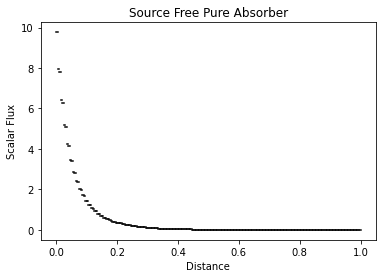

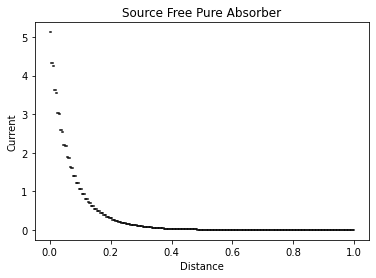

In [3]:
# source free pure absorber

sim_perams2 = {'data_type': data_type,
              'N_angles': 4,
              'L': L,
              'N_mesh': N_mesh,
              'boundary_condition_left': 'incident_iso',
              'boundary_condition_right': 'vacuum',
              'left_in_mag': 10,
              'right_in_mag': 10,
              'left_in_angle': 0,
              'right_in_angle': 0}

source_mesh = np.zeros(N_mesh, data_type)

[scalar_flux, current] = therefore.SourceItteration(sim_perams2, dx_mesh, xsec_mesh, xsec_scatter_mesh, source_mesh)

X = np.linspace(0, L, int(N_mesh*2+1))
f+=1
plt.figure(f)
plt.title('Source Free Pure Absorber')
plt.xlabel('Distance')
plt.ylabel('Scalar Flux')
flatLinePlot(X, scalar_flux)
plt.show()

f+=1
plt.figure(f)
plt.title('Source Free Pure Absorber')
plt.xlabel('Distance')
plt.ylabel('Current')
flatLinePlot(X, current)
plt.show()

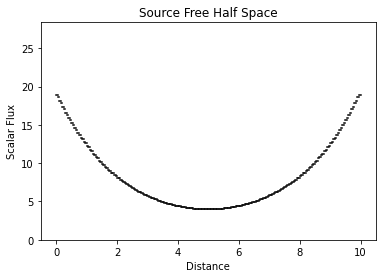

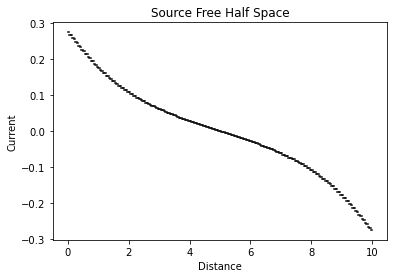

In [4]:
#source free half space

L = 10
dx = .1
xsec = 10
ratio = .999
scattering_xsec = xsec*ratio
source = 0
N_mesh = int(L/dx)

dx_mesh = dx*np.ones(N_mesh, data_type)
xsec_mesh = xsec*np.ones(N_mesh, data_type)
xsec_scatter_mesh = scattering_xsec*np.ones(N_mesh, data_type)
source_mesh = source*np.ones(N_mesh, data_type)


sim_perams3 = {'data_type': data_type,
              'N_angles': 4,
              'L': L,
              'N_mesh': N_mesh,
              'boundary_condition_left': 'incident_iso',
              'boundary_condition_right': 'incident_iso',
              'left_in_mag': 10,
              'right_in_mag': 10,
              'left_in_angle': 0,
              'right_in_angle': 0}

scattering_xsec = .999*xsec
source_mesh = np.zeros(N_mesh, data_type)
xsec_scatter_mesh = scattering_xsec*np.ones(N_mesh, data_type)


[scalar_flux, current] = therefore.SourceItteration(sim_perams3, dx_mesh, xsec_mesh, xsec_scatter_mesh, source_mesh)

X = np.linspace(0, L, int(N_mesh*2+1))
f+=1
plt.figure(f)
plt.title('Source Free Half Space')
plt.xlabel('Distance')
plt.ylabel('Scalar Flux')
plt.ylim([0,max(scalar_flux)*1.5])
flatLinePlot(X, scalar_flux)
plt.show()


f+=1
plt.figure(f)
plt.title('Source Free Half Space')
plt.xlabel('Distance')
plt.ylabel('Current')
flatLinePlot(X, current)
plt.show()

# Problem 1a


Strong absober homogenious region with a coherent incident beam of neutrons on the left edge and a reflecting condition on the right

Next Itteration: 859

Next Itteration: 1584

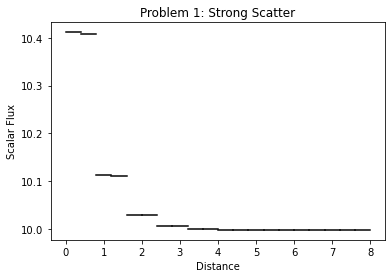

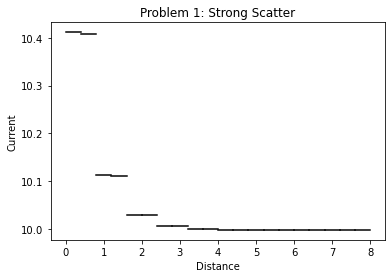

In [4]:
import therefore
import numpy as np
import matplotlib.pyplot as plt

data_type = np.float64

L = 10
dx = 1
xsec = 100
ratio = .995
scattering_xsec = xsec*ratio
source = 5
N_mesh = int(L/dx)

# TODO: Mesh building
dx_mesh = dx*np.ones(N_mesh, data_type)
xsec_mesh = xsec*np.ones(N_mesh, data_type)
xsec_scatter_mesh = scattering_xsec*np.ones(N_mesh, data_type)
source_mesh = source*np.ones(N_mesh, data_type)

sim_perams = {'data_type': data_type,
              'N_angles': 4,
              'L': L,
              'N_mesh': N_mesh,
              'boundary_condition_left': 'incident_ani',
              'boundary_condition_right': 'reflecting',
              'left_in_mag': 10,
              'right_in_mag': 0,
              'left_in_angle': 1,
              'right_in_angle': 0}

[scalar_flux, current] = therefore.SourceItteration(sim_perams, dx_mesh, xsec_mesh, xsec_scatter_mesh, source_mesh)

X = np.linspace(0, 8, int(N_mesh*2+1))
plt.figure(1)
flatLinePlot(X, scalar_flux)
plt.title('Problem 1: Strong Scatter')
plt.xlabel('Distance')
plt.ylabel('Scalar Flux')
plt.show()

X = np.linspace(0, 8, int(N_mesh*2+1))
plt.figure(1)
flatLinePlot(X, scalar_flux)
plt.title('Problem 1: Strong Scatter')
plt.xlabel('Distance')
plt.ylabel('Current')
plt.show()


# Problem 1b


Same as 1a only now with 100 cells!

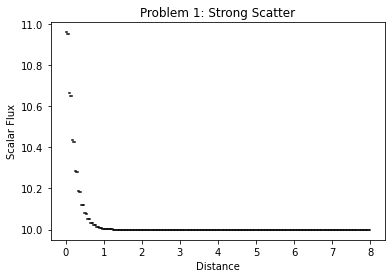

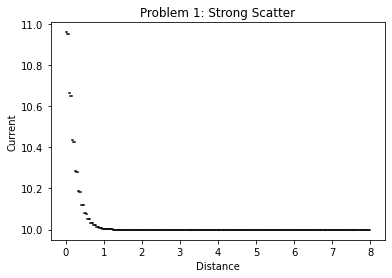

In [13]:
import therefore
import numpy as np
import matplotlib.pyplot as plt

data_type = np.float64

L = 10
dx = .1
xsec = 100
ratio = .995
scattering_xsec = xsec*ratio
source = 5
N_mesh = int(L/dx)

# TODO: Mesh building
dx_mesh = dx*np.ones(N_mesh, data_type)
xsec_mesh = xsec*np.ones(N_mesh, data_type)
xsec_scatter_mesh = scattering_xsec*np.ones(N_mesh, data_type)
source_mesh = source*np.ones(N_mesh, data_type)

sim_perams = {'data_type': data_type,
              'N_angles': 4,
              'L': L,
              'N_mesh': N_mesh,
              'boundary_condition_left': 'incident_ani',
              'boundary_condition_right': 'reflecting',
              'left_in_mag': 10,
              'right_in_mag': 0,
              'left_in_angle': 1,
              'right_in_angle': 0}

[scalar_flux, current] = therefore.SourceItteration(sim_perams, dx_mesh, xsec_mesh, xsec_scatter_mesh, source_mesh)

X = np.linspace(0, 8, int(N_mesh*2+1))
plt.figure(1)
flatLinePlot(X, scalar_flux)
plt.title('Problem 1: Strong Scatter')
plt.xlabel('Distance')
plt.ylabel('Scalar Flux')
plt.show()

X = np.linspace(0, 8, int(N_mesh*2+1))
plt.figure(1)
flatLinePlot(X, scalar_flux)
plt.title('Problem 1: Strong Scatter')
plt.xlabel('Distance')
plt.ylabel('Current')
plt.show()


# Reed's Problem:

/tmp/ipykernel_24309/691514763.py:11: RuntimeWarning: divide by zero encountered in true_divide
  dx = .1/sigma_t


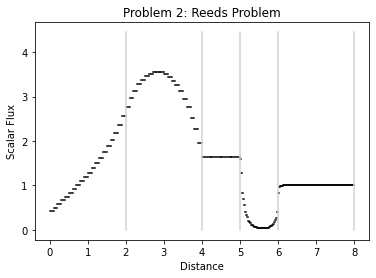

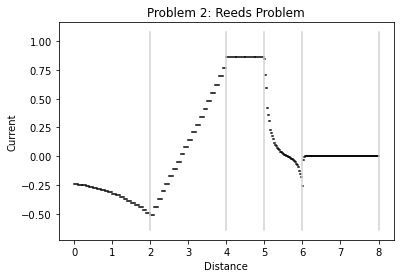

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#mesh builder for Reed's Problem
region_id = np.array([1,2,3,4,5], int)
region_widths = np.array([2,2,1,1,2], int)
region_bounds = np.array([2,4,5,6,8], float)
sigma_s = np.array([.9, .9, 0, 0, 0], data_type)
sigma_t = np.array([1, 1, 0, 5, 50], data_type)
Source = np.array([0, 1, 0, 0, 50], data_type)
dx = .1/sigma_t
dx[2] = .25
N_region = np.array(region_widths/dx, int)

N_mesh: int = sum(N_region)

xsec_mesh = np.empty(N_mesh, data_type)
xsec_scatter_mesh = np.empty(N_mesh, data_type)
dx_mesh = np.empty(N_mesh, data_type)
source_mesh = np.empty(N_mesh, data_type)
region_id_mesh = np.empty(N_mesh, data_type)

for i in range(region_widths.size):
    LB = sum(N_region[:i])
    RB = sum(N_region[:i+1])
    xsec_mesh[LB:RB] = sigma_t[i]
    xsec_scatter_mesh[LB:RB] = sigma_s[i]
    dx_mesh[LB:RB] = dx[i]
    source_mesh[LB:RB] = Source[i]
    region_id_mesh[LB:RB] = region_id[i]

sim_perams = {'data_type': data_type,
              'N_angles': 4,
              'L': L,
              'N_mesh': N_mesh,
              'boundary_condition_left': 'vacuum',
              'boundary_condition_right': 'reflecting',
              'left_in_mag': 0,
              'right_in_mag': 0,
              'left_in_angle': 0,
              'right_in_angle': 0}


[scalar_flux, current] = therefore.SourceItteration(sim_perams, dx_mesh, xsec_mesh, xsec_scatter_mesh, source_mesh)


Y_reg = [0, max(scalar_flux)*1.25]
X_reg = [0,0]

x_plot = np.zeros(N_mesh*2+1)
for i in range(N_mesh):
    x_plot[2*i] = sum(dx_mesh[:i])
    x_plot[2*i+1] = sum(dx_mesh[:i+1])
x_plot[-1] = 8.00001

f += 1
plt.figure(f)
flatLinePlot(x_plot, scalar_flux)
plt.title('Problem 2: Reeds Problem')
plt.xlabel('Distance')
plt.ylabel('Scalar Flux')
# plot region demarkers
for i in range(5):
    X_reg[0] = region_bounds[i]
    X_reg[1] = region_bounds[i]
    plt.plot(X_reg, Y_reg, c='lightgrey')
plt.show()

Y_reg = [min(current)*1.25, max(current)*1.25]
X_reg = [0,0]

f+=1
plt.figure(f)
plt.figure(f)
flatLinePlot(x_plot, current)
plt.title('Problem 2: Reeds Problem')
plt.xlabel('Distance')
plt.ylabel('Current')
# plot region demarkers
for i in range(5):
    X_reg[0] = region_bounds[i]
    X_reg[1] = region_bounds[i]
    plt.plot(X_reg, Y_reg, c='lightgrey')
plt.show()